In [1]:
import matplotlib.pyplot as plt
import tools.dataTools as dt
from constants import Constants
import figure_params
import pandas as pd
import seaborn as sns
import os
from importlib import reload
reload(dt)

figure_params.set_rc_params()
figure_params.setup_directories()

SUBFIG_DIR = Constants.FIG_FOLDER + 'figS5_force_training/'
if not os.path.exists(SUBFIG_DIR):
    os.makedirs(SUBFIG_DIR)

#run simulations for figure
import subprocess
subprocess.call(['sh', '../simulation/fig_simulations/Sfig_force_sims.sh'])


In [2]:
repertoires = Constants.UNIS
seed_ex = Constants.SEED_EX
seeds = Constants.SEEDS

#### Output 

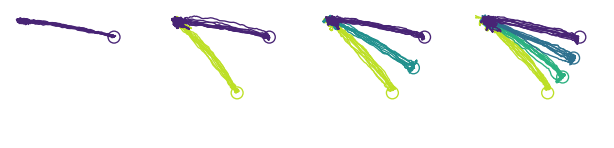

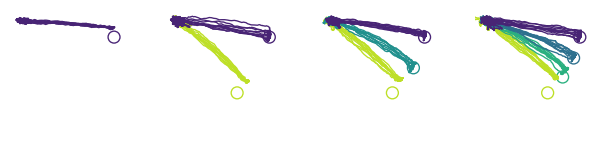

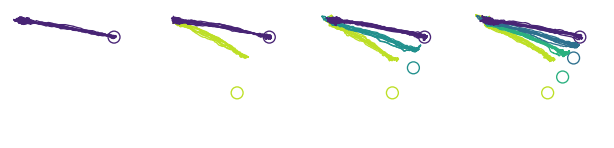

In [3]:
# after skill learning
g, params = dt.graph_outputs_all(seed_ex, 'uni_rad', repertoires)
plt.savefig(SUBFIG_DIR + "output_" + params +'.pdf', format='pdf')

# after adaptation SGD
g, params = dt.graph_outputs_all(seed_ex, 'uni_rad', repertoires, 
    perturbation = 'rotation', pert_param = 10.0, pert_set = 'v1',
    learning_datafile = True)
plt.savefig(SUBFIG_DIR + "output_" + params +'.pdf', format='pdf')

# after adaptation FORCE
g, params = dt.graph_outputs_all(seed_ex, 'uni_rad', repertoires, 
    perturbation = 'rotation', pert_param = 10.0, pert_set = 'v5',
    learning_datafile = True)
plt.savefig(SUBFIG_DIR + "output_" + params +'.pdf', format='pdf')

#### MSE

In [4]:
mse_df = dt.get_testing_MSE_df(seeds, 'uni_rad', repertoires)
mse_df['sim'] = 'pre_training'

mse_df_ = dt.get_testing_MSE_df(seeds, 'uni_rad', repertoires, 
    perturbation = 'rotation', pert_param = 10.0, pert_set = 'v1',
    learning_datafile = True)
mse_df_['sim'] = 'rad_SGD'
mse_df = pd.concat([mse_df, mse_df_])

mse_df_ = dt.get_testing_MSE_df(seeds, 'uni_rad', repertoires, 
    perturbation = 'rotation', pert_param = 10.0, pert_set = 'v5',
    learning_datafile = True)
mse_df_['sim'] = 'rad_FORCE'
mse_df = pd.concat([mse_df, mse_df_])


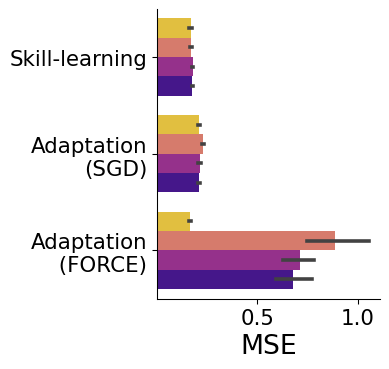

In [5]:
fig = plt.figure(figsize=(3,4))
point_colors = Constants.REPERTOIRE_COLORS
colors_dict = dict(zip(repertoires, point_colors))
g = sns.barplot(data = mse_df, y= 'sim', x='mse', hue='repertoire', palette = colors_dict)

g.set_xlabel('MSE')
g.set_ylabel('')
g.set_yticklabels(['Skill-learning', 'Adaptation\n(SGD)', 'Adaptation\n (FORCE)'])
g.legend().remove()
g.set_xticks([0.5,1.0])
plt.savefig(SUBFIG_DIR + "catastrophic_forgetting_MSE" +'.pdf', format='pdf')

#### Loss during training 

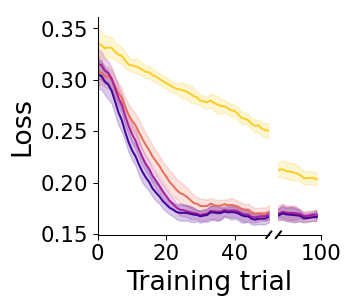

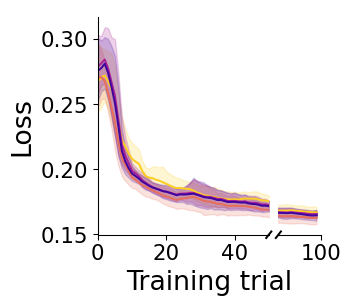

In [6]:
smooth = True
#SGD
_, _, params = dt.graph_loss_broken_axis(seeds, 'uni_rad', repertoires, 'rotation', 10.0, 'v1', smooth=smooth, rel_loss = False)
plt.savefig(SUBFIG_DIR + "loss_" + params +'.pdf', format='pdf')

#FORCE
_, _, params = dt.graph_loss_broken_axis(seeds, 'uni_rad', repertoires, 'rotation', 10.0, 'v5', smooth=smooth, rel_loss = False, measure = 'test_error')
plt.savefig(SUBFIG_DIR + "loss_" + params +'.pdf', format='pdf')